Group 1 Phase 4




## Forecasting Real Estate Prices: Identifying the Top 5 Zip Codes for Investment Using Time Series Analysis

### 1. Introduction

**Zillow Home Value Index (ZHVI):** A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. ZHVI is available both as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow publishes:
- **Top-Tier ZHVI:** Typical value for homes within the 65th to 95th percentile range for a given region.
- **Bottom-Tier ZHVI:** Typical value for homes within the 5th to 35th percentile range for a given region.
- **ZHVI for All Single-Family Residences:** Typical value for all single-family homes in a given region.
- **ZHVI for Condos/Co-ops:** Typical value for condos and co-ops.
- **ZHVI by Bedroom Count:** Typical values for homes with 1, 2, 3, 4, and 5+ bedrooms.
- **ZHVI per Square Foot:** Typical value of all homes per square foot, calculated by dividing the estimated home value by the home’s square footage.

This information was sourced from the Zillow website.

Investing in real estate is a multifaceted endeavor, requiring a keen understanding of market dynamics and future trends. As consultants for a fictional real estate investment firm, our primary task is to forecast real estate prices across various zip codes using historical data from Zillow Research. This analysis will help identify the top five zip codes that present the most lucrative investment opportunities. Leveraging time series modeling, we aim to provide insights that balance potential profit margins with associated risks, ensuring a data-driven approach to investment decisions.

### 1.1 Problem Statement

The investment firm has posed a seemingly straightforward question: "What are the top 5 best zip codes for us to invest in?" However, defining "best" involves addressing several layers of complexity. The firm requires a comprehensive analysis that considers:

- **Profit Margins:** Identifying areas with the highest potential for price appreciation.
- **Risk:** Assessing the volatility and stability of the market in each zip code.
- **Time Horizon:** Determining the appropriate period for investment, whether short-term or long-term.

Our challenge is to forecast future real estate prices accurately and synthesize this information to make well-rounded investment recommendations.

### 1.2 Main Objective

The main objective of this analysis is to identify the top five zip codes for investment by forecasting future real estate prices using time series modeling. This involves assessing potential profit margins, evaluating associated risks, and determining an appropriate investment time horizon to provide well-rounded, data-driven recommendations to the real estate investment firm.

### 1.3 Metrics of Success

- **Forecast Accuracy:**
  - **Mean Absolute Error (MAE):** Measures the average magnitude of errors in the forecasts, providing insight into the overall accuracy.
  - **Root Mean Squared Error (RMSE):** Emphasizes larger errors more than MAE, useful for understanding the variance in the error distribution.
  - **Mean Absolute Percentage Error (MAPE):** Provides a percentage error, allowing for comparison across different zip codes regardless of price level.
  
- **Profit Potential:**
  - **Expected Price Appreciation:** The projected percentage increase in real estate prices for each zip code over the chosen time horizon.
  - **Return on Investment (ROI):** Calculated based on the forecasted price appreciation, providing a direct measure of potential profitability.
  
- **Risk Assessment:**
  - **Price Volatility:** Standard deviation of historical price changes, indicating the stability or risk associated with each zip code.
  - **Value at Risk (VaR):** An estimate of the potential loss in value under normal market conditions over a specific period, providing a quantitative measure of risk.
  
- **Investment and Recommendation:**
  - **Balanced Scorecard:** A composite index that integrates forecast accuracy, expected profit potential, and risk assessment to rank the zip codes. This ensures a holistic evaluation and aids in making robust investment decisions.
  
- **Stakeholder Satisfaction:**
  - **Clarity and Actionability of Report:** Feedback from stakeholders on the comprehensiveness and usability of the final recommendations.
  - **Decision-making Support:** The extent to which the analysis supports informed and confident investment decisions by the firm.

By meeting these metrics, the analysis will successfully identify the best zip codes for investment, balancing profitability with risk and providing actionable insights for the real estate investment firm.

### 1.4 Methodology

- **Data Preprocessing**
  - Data Cleaning
  - Data Transformation
  
- **Explorative Data Analysis**
  - Univariate, Bivariate, and Multivariate analysis
  - Visualization
  
- **Statistical Analysis**

- **Modeling**
  - Model Selection
  - Model Training and Validation
  - Model Evaluation

- **Forecasting and Results Interpretation**
  - Forecast Future Values
  - Interpret Results

- **Model Deployment**
  - Create a Deployment Pipeline
  - Infrastructure Setup
  - Monitoring and Maintenance

### 1.5 Data Description

The dataset used for this project was downloaded from a GitHub repository, which originally sourced the data from Zillow housing data. The dataset spans from April 1996 to April 2018 and provides detailed monthly home value data for a wide range of regions across the United States.

The dataset has 14,723 rows and 272 columns. The information contained within the columns is as follows, as described by the data dictionary:

- **RegionID:** A unique identifier for the region.
- **RegionName:** A numerical code representing the region (e.g., ZIP code).
- **City:** The city name.
- **State:** The state abbreviation.
- **Metro:** The metropolitan area name.
- **CountyName:** The county name.
- **SizeRank:** The size rank of the region, with 1 being the largest in terms of population or housing market.
- **Monthly Home Values:** The columns labeled with dates (e.g., "1996-04", "1996-05", etc.) represent the Zillow Home Value Index for that region in those specific months. These values are typically the median home values and are given in dollars. This ranges from April 1996 to April 2018.



## Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pgeocode
from matplotlib.ticker import ScalarFormatter

# Load the data

df = pd.read_csv('zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [2]:
# Display the first few rows of the dataframe
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.shape

(14723, 272)

In [4]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [5]:
# Get a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
# Check for missing values
df.isnull().mean()

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         0.070842
                ...   
2017-12       0.000000
2018-01       0.000000
2018-02       0.000000
2018-03       0.000000
2018-04       0.000000
Length: 272, dtype: float64

In [7]:
# Filter rows where the 'Metro' column has null values
null_metro = df[df['Metro'].isnull()]

# Display the rows with null values in the 'Metro' column
null_metro.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
151,69340,27410,Greensboro,NC,NaN,Guilford,152,137100.0,136600.0,136000.0,...,212900,213200,213600,214300,215100,216200,217700,219600,221000,221500
167,69336,27406,Greensboro,NC,NaN,Guilford,168,80900.0,80700.0,80400.0,...,109700,107900,106700,107200,107900,108700,109500,110000,110700,111300
491,69270,27265,High Point,NC,NaN,Guilford,492,108000.0,107700.0,107400.0,...,159300,157400,156300,156600,156700,156600,156800,157000,157400,157800
526,69337,27407,Greensboro,NC,NaN,Guilford,527,93900.0,93700.0,93400.0,...,122000,120800,119800,119800,120300,121100,122200,123100,124000,124900
695,69335,27405,Greensboro,NC,NaN,Guilford,696,74100.0,73900.0,73800.0,...,91500,90200,89000,88700,88900,89700,91000,92100,93100,93700
1578,69298,27320,Reidsville,NC,NaN,Rockingham,1579,51000.0,51300.0,51600.0,...,70900,71000,71300,71900,72900,73700,73900,73500,72800,72400
2447,70178,28734,Franklin,NC,NaN,Macon,2448,62000.0,62200.0,62400.0,...,142700,143500,144500,145000,144800,144100,143800,143300,142600,142200
2801,91865,77351,West Livingston,TX,NaN,Polk,2802,60700.0,60700.0,60800.0,...,135100,136200,137700,138900,139500,139700,139900,140100,140200,140300
3027,69354,27455,Greensboro,NC,NaN,Guilford,3028,111600.0,111500.0,111300.0,...,189800,190100,190000,189800,189900,190500,191400,192200,193100,193700
3535,75303,39452,Lucedale,MS,NaN,George,3536,78800.0,78900.0,79000.0,...,139600,140700,141100,140600,140600,140600,140400,140700,141900,143100


In [8]:
# Function to fill null values in the 'Metro' column using the mode of each 'CountyName'
def fill_metro_with_mode(df):
    # Calculate the mode of 'Metro' for each 'CountyName'
    metro_mode_by_county = df.groupby('CountyName')['Metro'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    
    # Fill the null values with the mode for the corresponding 'CountyName'
    df['Metro'] = df.apply(lambda row: metro_mode_by_county[row['CountyName']] if pd.isnull(row['Metro']) else row['Metro'], axis=1)
    
    return df

# Fill null values in the 'Metro' column
df_filled = fill_metro_with_mode(df)

In [9]:
# Display the rows where 'Metro' was initially null to verify the fill
null_metro_rows_filled = df_filled[df_filled['Metro'].isnull()]
print(null_metro_rows_filled)


       RegionID  RegionName                 City State Metro CountyName  \
151       69340       27410           Greensboro    NC  None   Guilford   
167       69336       27406           Greensboro    NC  None   Guilford   
491       69270       27265           High Point    NC  None   Guilford   
526       69337       27407           Greensboro    NC  None   Guilford   
695       69335       27405           Greensboro    NC  None   Guilford   
...         ...         ...                  ...   ...   ...        ...   
14677     79888       49718            Carp Lake    MI  None      Emmet   
14682     94344       83846              Wallace    ID  None   Shoshone   
14683     97304       93517           Bridgeport    CA  None       Mono   
14694     99114       97149             Neskowin    OR  None  Tillamook   
14721     93733       81225  Mount Crested Butte    CO  None   Gunnison   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
151         152  1

In [10]:
# Check for any remaining missing values
df_filled.isnull().mean()

RegionID      0.00000
RegionName    0.00000
City          0.00000
State         0.00000
Metro         0.03987
               ...   
2017-12       0.00000
2018-01       0.00000
2018-02       0.00000
2018-03       0.00000
2018-04       0.00000
Length: 272, dtype: float64

In [11]:
# Drop rows where 'Metro' is still null
df_filled_cleaned = df_filled.dropna(subset=['Metro'])

# Display the cleaned DataFrame to verify
print(df_filled_cleaned)

       RegionID  RegionName       City State              Metro CountyName  \
0         84654       60657    Chicago    IL            Chicago       Cook   
1         90668       75070   McKinney    TX  Dallas-Fort Worth     Collin   
2         91982       77494       Katy    TX            Houston     Harris   
3         84616       60614    Chicago    IL            Chicago       Cook   
4         93144       79936    El Paso    TX            El Paso    El Paso   
...         ...         ...        ...   ...                ...        ...   
14717     62697       12720     Bethel    NY          Claremont   Sullivan   
14718     58333        1338   Ashfield    MA    Greenfield Town   Franklin   
14719     59107        3293  Woodstock    NH          Claremont    Grafton   
14720     75672       40404      Berea    KY           Richmond    Madison   
14722     95851       89155   Mesquite    NV          Las Vegas      Clark   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  20

In [12]:
# Check for any remaining missing values
df_filled_cleaned.isnull().mean()

RegionID      0.0
RegionName    0.0
City          0.0
State         0.0
Metro         0.0
             ... 
2017-12       0.0
2018-01       0.0
2018-02       0.0
2018-03       0.0
2018-04       0.0
Length: 272, dtype: float64

In [13]:
df = df_filled_cleaned
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14717,62697,12720,Bethel,NY,Claremont,Sullivan,14718,62500.0,62600.0,62700.0,...,122200,122700,122300,122000,122200,122800,123200,123200,120700,117700
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400


# Step 2: Data Preprocessing

In [14]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    date_columns = []
    for col in df.columns[1:]:  # Skip the first column assuming it's 'RegionName'
        try:
            pd.to_datetime(col, format='%Y-%m')
            date_columns.append(col)
        except ValueError:
            continue
    return date_columns


In [15]:
# Identify columns that can be converted to datetime
date_columns = get_datetimes(df)
print("Date Columns:", date_columns)


Date Columns: ['1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-

In [16]:
print("Number of Date Columns:", len(date_columns))

Number of Date Columns: 265


In [17]:
# Convert wide format to long format
df_long = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], 
                  var_name='Date', value_name='Price')

# Display the first few rows of the long format dataframe
df_long.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Price
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


In [18]:
df_long.shape

(3746040, 9)

In [19]:
# Check for any missing values on the long format 
print(df_long.isnull().sum())


RegionID           0
RegionName         0
City               0
State              0
Metro              0
CountyName         0
SizeRank           0
Date               0
Price         133490
dtype: int64


In [20]:
# Forward fill the missing values
df_long['Price'] = df_long['Price'].fillna(method='ffill')

In [21]:
#Display the cleaned DataFrame to verify
df_long

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Price
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...
3746035,62697,12720,Bethel,NY,Claremont,Sullivan,14718,2018-04,117700.0
3746036,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,2018-04,209300.0
3746037,59107,3293,Woodstock,NH,Claremont,Grafton,14720,2018-04,225800.0
3746038,75672,40404,Berea,KY,Richmond,Madison,14721,2018-04,133400.0


In [22]:
#verify there is no missing values 
print(df_long.isnull().sum())


RegionID      0
RegionName    0
City          0
State         0
Metro         0
CountyName    0
SizeRank      0
Date          0
Price         0
dtype: int64


In [23]:
# Set the date column as the index
df_long.set_index('Date', inplace=True)

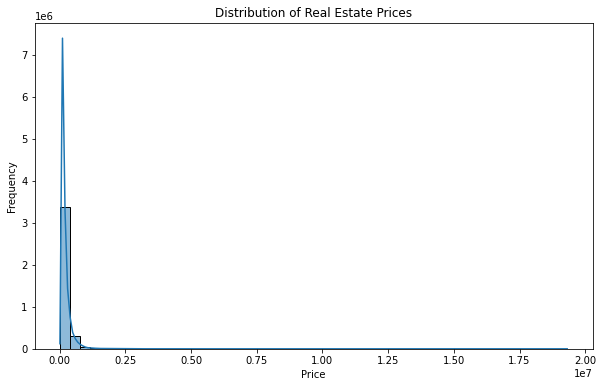

In [24]:
# Histogram of real estate prices
plt.figure(figsize=(10, 6))
sns.histplot(df_long['Price'], bins=50, kde=True)
plt.title('Distribution of Real Estate Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Interpretation:

Skewness: The histogram is heavily right-skewed (positively skewed). This means that most of the real estate prices are clustered towards the lower end of the price spectrum, with a long tail extending towards higher prices.

Outliers: There are a few outliers with very high prices, which are responsible for the long tail on the right side of the histogram.

Concentration of Prices: The majority of the real estate prices are concentrated at the lower end, indicating that lower-priced properties are more common in the dataset.

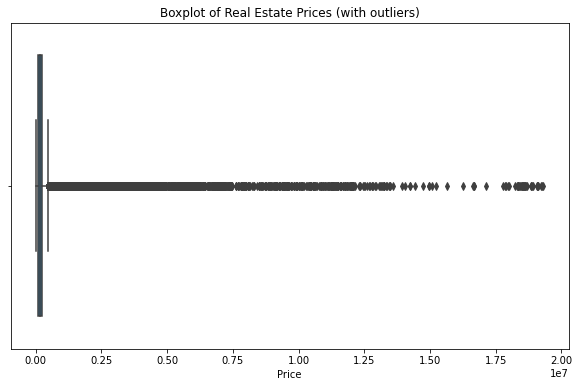

In [25]:
# Plotting the boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_long['Price'])
plt.title('Boxplot of Real Estate Prices (with outliers)')
plt.xlabel('Price')
plt.show()

Median: The thick horizontal line within the box represents the median of the real estate prices. This is the midpoint of the data, where 50% of the values are below this point and 50% are above.

Interquartile Range (IQR): The box itself represents the interquartile range, which contains the middle 50% of the data. The bottom and top edges of the box correspond to the 25th percentile (Q1) and 75th percentile (Q3) of the data, respectively.

Whiskers: The lines extending from the top and bottom of the box (whiskers) represent the range within 1.5 times the IQR from the Q1 and Q3. This is a common way to detect potential outliers.

Outliers: The points beyond the whiskers are considered outliers. These are the data points that fall outside 1.5 times the IQR from the Q1 and Q3. The plot shows a significant number of outliers on the higher end of the price spectrum, indicating that there are many properties with prices much higher than the typical range.

Skewness: The presence of many outliers on the higher end suggests a positive skew in the data. This confirms the right-skewness observed in the histogram previously.


Next steps

Investigate Outliers: Identify and investigate these outliers to understand the characteristics of these high-priced properties. Determine if they should be included or excluded from further analysis based on their impact on the results.


Compare with and without Outliers: Conduct analysis both including and excluding the outliers to understand their impact on the overall analysis and conclusions.

In [26]:
#Checking for Outliers using IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_long['Price'].quantile(0.25)
Q3 = df_long['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the outlier cutoff
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_long[(df_long['Price'] < lower_bound) | (df_long['Price'] > upper_bound)]

# Print the number of outliers and some examples
print(f"Number of outliers: {len(outliers)}")
outliers.head()


Number of outliers: 285184


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price
Date,,,,,,,,
1996-04,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0
1996-04,61703,10128,New York,NY,New York,New York,22,3676700.0
1996-04,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200.0
1996-04,97569,94115,San Francisco,CA,San Francisco,San Francisco,743,794000.0


We didnot remove outliers...

In [27]:
# Convert the 'Price' column to numeric, forcing non-numeric values to NaN
df_long['Price'] = pd.to_numeric(df_long['Price'], errors='coerce')


# Set pandas display options to avoid scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Print summary statistics including outliers
print("Summary statistics including outliers:")
print(df_long['Price'].describe())

Summary statistics including outliers:
count    3746040.00
mean      209470.28
std       241227.24
min        11400.00
25%        98900.00
50%       148900.00
75%       239700.00
max     19314900.00
Name: Price, dtype: float64


In [28]:
df_long.describe()

,RegionID,RegionName,SizeRank,Price
count,3746040.00,3746040.00,3746040.00,3746040.00
mean,80960.47,47751.13,7228.09,209470.28
std,32524.42,29516.42,4249.39,241227.24
min,58196.00,1001.00,1.00,11400.00
25%,66842.50,21223.50,3541.75,98900.00
50%,77653.00,45322.50,7130.50,148900.00
75%,90766.75,75083.25,10887.50,239700.00
max,753844.00,99901.00,14723.00,19314900.00


In [29]:
df = df_long
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price
Date,,,,,,,,
1996-04,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00
1996-04,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00
1996-04,91982,77494,Katy,TX,Houston,Harris,3,210400.00
1996-04,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00
1996-04,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00
...,...,...,...,...,...,...,...,...
2018-04,62697,12720,Bethel,NY,Claremont,Sullivan,14718,117700.00
2018-04,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.00
2018-04,59107,3293,Woodstock,NH,Claremont,Grafton,14720,225800.00


In [30]:
df.shape

(3746040, 8)

In [31]:
df.dtypes

RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
Price         float64
dtype: object

Histogram Interpretation with Summary Statistics


### Univariate Analysis

#### City

This plot shows the top 20 most frequent cities in the dataset.

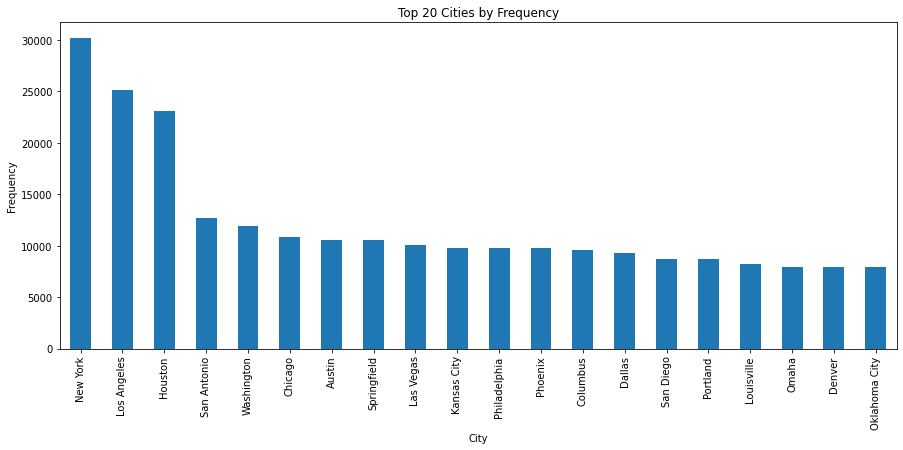

In [32]:
# Unique values and frequency
city_counts = df['City'].value_counts()

# Plotting the frequency of City
plt.figure(figsize=(15, 6))
city_counts.head(20).plot(kind='bar')
plt.title('Top 20 Cities by Frequency')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.show()

#### State 

This plot shows the frequency of each state in the dataset.

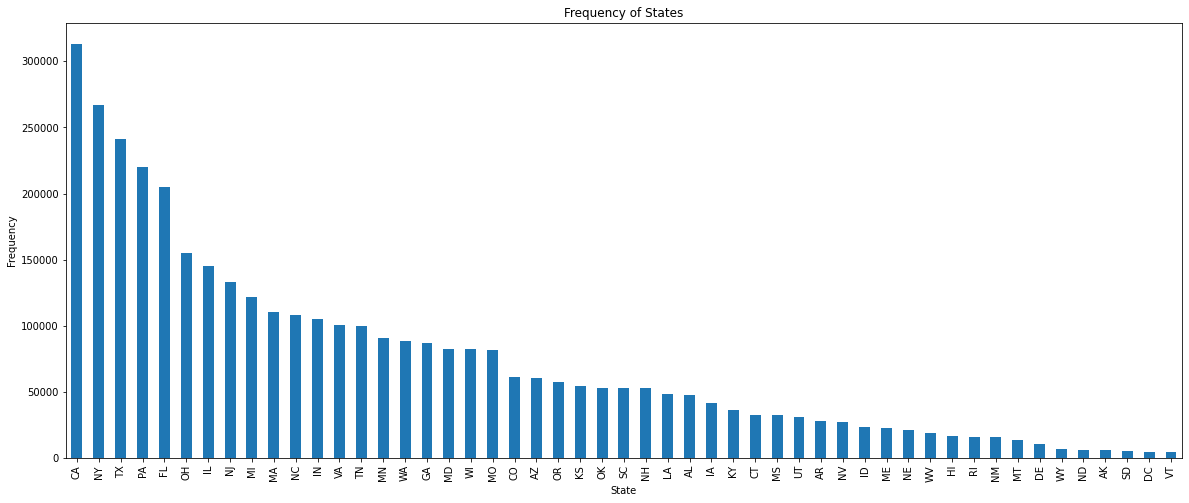

In [33]:
# Unique values and frequency
state_counts = df['State'].value_counts()

# Plotting the frequency of State
plt.figure(figsize=(20, 8))
state_counts.plot(kind='bar')
plt.title('Frequency of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()


#### Metro 

This plot shows the top 20 most frequent metro areas in the dataset.

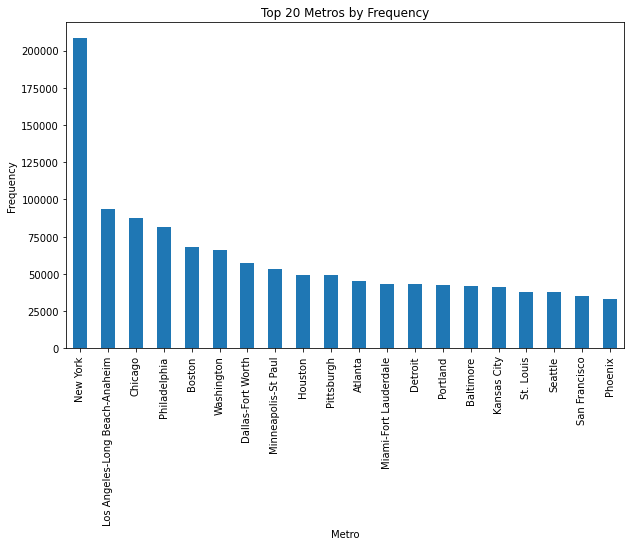

In [34]:
# Unique values and frequency
metro_counts = df['Metro'].value_counts()

# Plotting the frequency of Metro
plt.figure(figsize=(10, 6))
metro_counts.head(20).plot(kind='bar')
plt.title('Top 20 Metros by Frequency')
plt.xlabel('Metro')
plt.ylabel('Frequency')
plt.show()


#### County Name

This plot shows the top 20 most frequent counties in the dataset.

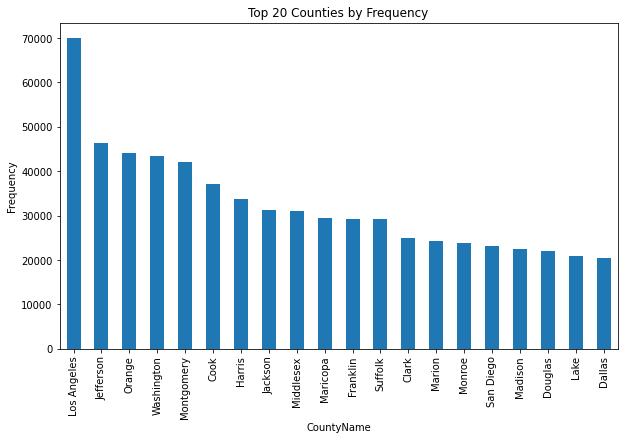

In [35]:
# Unique values and frequency
county_counts = df['CountyName'].value_counts()

# Plotting the frequency of CountyName
plt.figure(figsize=(10, 6))
county_counts.head(20).plot(kind='bar')
plt.title('Top 20 Counties by Frequency')
plt.xlabel('CountyName')
plt.ylabel('Frequency')
plt.show()


### Bivariate Analysis

#### Price vs City 

This plot shows the top 20 cities by average price, highlighting cities with the highest housing prices.

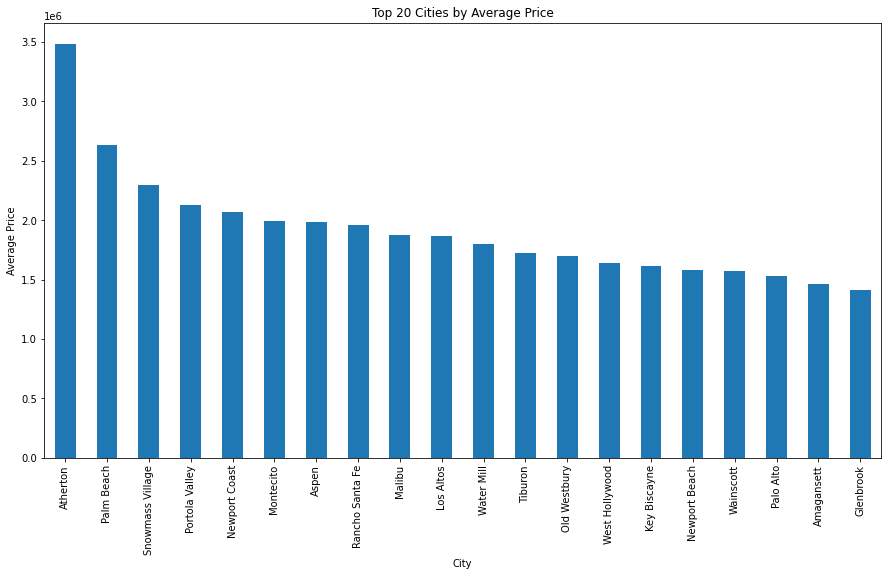

In [36]:
# Aggregating average price by City
city_price = df.groupby('City')['Price'].mean().sort_values(ascending=False).head(20)

# Plotting the average price by City
plt.figure(figsize=(15, 8))
city_price.plot(kind='bar')
plt.title('Top 20 Cities by Average Price')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()


#### Price vs State

This plot shows the average price of houses in each state, revealing the states with higher housing prices.

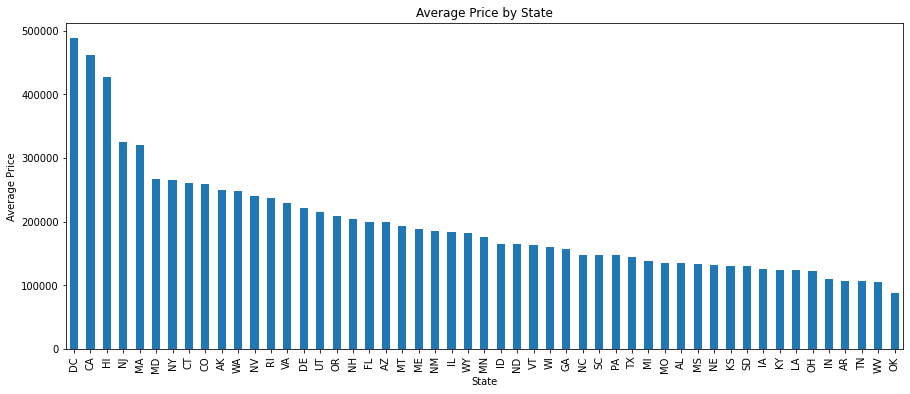

In [37]:
# Aggregating average price by State
state_price = df.groupby('State')['Price'].mean().sort_values(ascending=False)

# Plotting the average price by State
plt.figure(figsize=(15, 6))
state_price.plot(kind='bar')
plt.title('Average Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.show()


#### Price vs Metro 

This plot shows the top 20 metro areas by average price, indicating which metro areas have the highest housing prices.

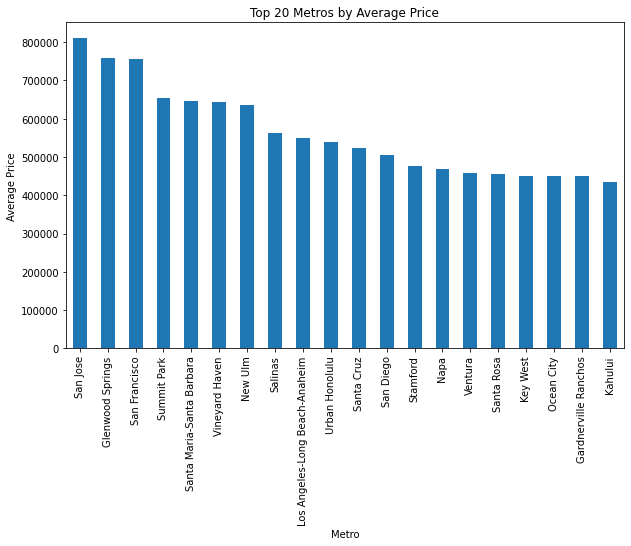

In [38]:
# Aggregating average price by Metro
metro_price = df.groupby('Metro')['Price'].mean().sort_values(ascending=False).head(20)

# Plotting the average price by Metro
plt.figure(figsize=(10, 6))
metro_price.plot(kind='bar')
plt.title('Top 20 Metros by Average Price')
plt.xlabel('Metro')
plt.ylabel('Average Price')
plt.show()


#### Price vs County Name 

This plot shows the top 20 counties by average price, highlighting the counties with the highest housing prices.

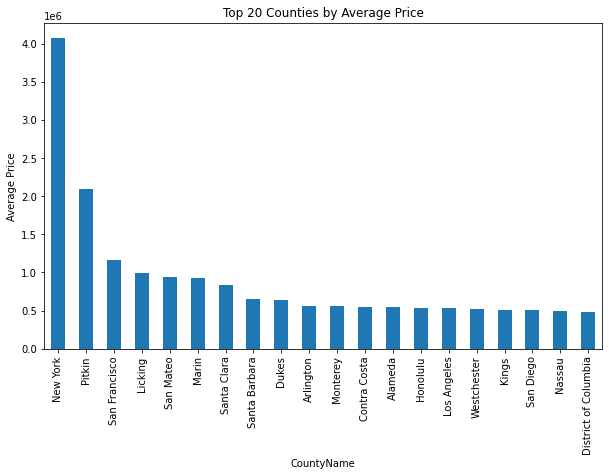

In [39]:
# Aggregating average price by CountyName
county_price = df.groupby('CountyName')['Price'].mean().sort_values(ascending=False).head(20)

# Plotting the average price by CountyName
plt.figure(figsize=(10, 6))
county_price.plot(kind='bar')
plt.title('Top 20 Counties by Average Price')
plt.xlabel('CountyName')
plt.ylabel('Average Price')
plt.show()


#### Price vs Size Rank

This scatter plot shows the relationship between Price and SizeRank. It helps to identify any trends or patterns, such as whether higher-ranked regions have higher or lower prices.

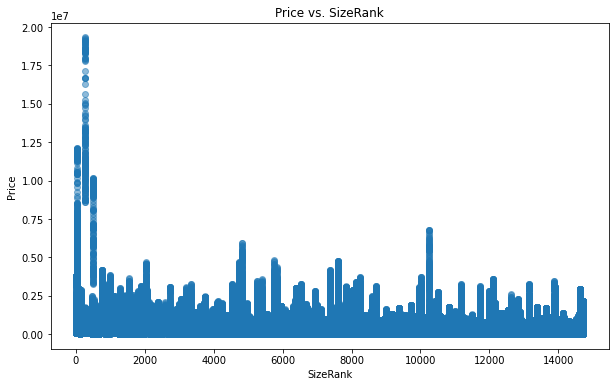

In [40]:
# Scatter plot of Price vs. SizeRank
plt.figure(figsize=(10, 6))
plt.scatter(df['SizeRank'], df['Price'], alpha=0.5)
plt.title('Price vs. SizeRank')
plt.xlabel('SizeRank')
plt.ylabel('Price')
plt.show()


#### Price vs Date 

This line plot shows the trend of average housing prices over time, highlighting any increases or decreases in prices.

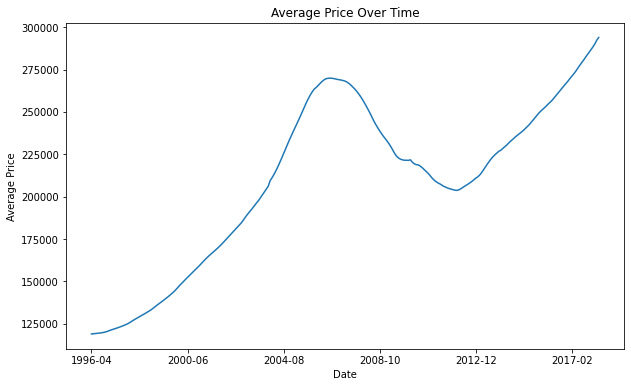

In [41]:
# Aggregating average price by Date
date_price = df.groupby('Date')['Price'].mean()

# Plotting the average price by Date
plt.figure(figsize=(10, 6))
date_price.plot(kind='line')
plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()


#### Correlation Matrix


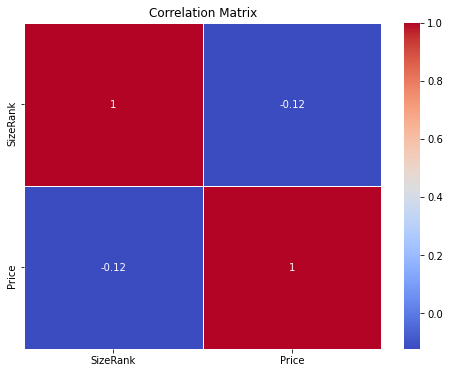

In [42]:
# Correlation matrix for numerical columns
correlation_matrix = df[['SizeRank', 'Price']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Correlation Strength:

The correlation between SizeRank and Price is weakly negative (-0.12). This suggests that as the size rank of a region increases (indicating a smaller or less significant region), the housing prices tend to decrease slightly, but the relationship is not strong.

Implications:

The weak negative correlation implies that SizeRank is not a strong predictor of Price. Other factors might have a more significant impact on housing prices.

Color Interpretation:

The colors in the heatmap confirm the numeric values, with blue indicating the negative correlation and red indicating the positive correlation along the diagonal.

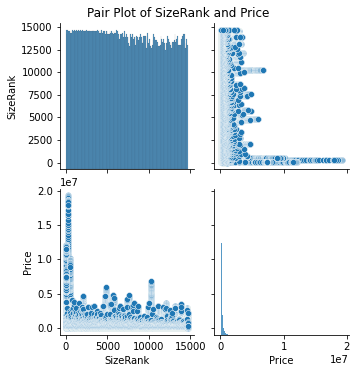

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of selected variables
sns.pairplot(df, vars=['SizeRank', 'Price'])
plt.suptitle('Pair Plot of SizeRank and Price', y=1.02)
plt.show()


Key Observations:

SizeRank Distribution: The SizeRank values are evenly distributed, indicating a wide range of region sizes in the dataset.
Price Distribution: The Price values are right-skewed, with most houses priced at the lower end of the spectrum and a few very high-priced houses.

Weak Negative Correlation: The scatter plots suggest a weak negative correlation between SizeRank and Price, meaning that larger regions (with lower SizeRank) tend to have higher prices, but the relationship is not strong.

Implications:
Data Transformation: For further analysis, particularly if you need a more normal distribution of prices, you might consider transforming the Price data (e.g., log transformation).

Further Analysis: Explore additional variables and their interactions to understand other factors influencing housing prices. The weak correlation between SizeRank and Price suggests that other variables might play a more significant role.

Next Steps:

Transform Data: Consider transforming the Price variable if normality is required for further statistical analysis.
Explore More Variables: Extend the analysis to include more variables (e.g., City, State, Metro, CountyName) to uncover more complex relationships.

Model Building: Use the insights from this analysis to build predictive models, incorporating multiple variables to predict housing prices.

### Multivariate Analysis

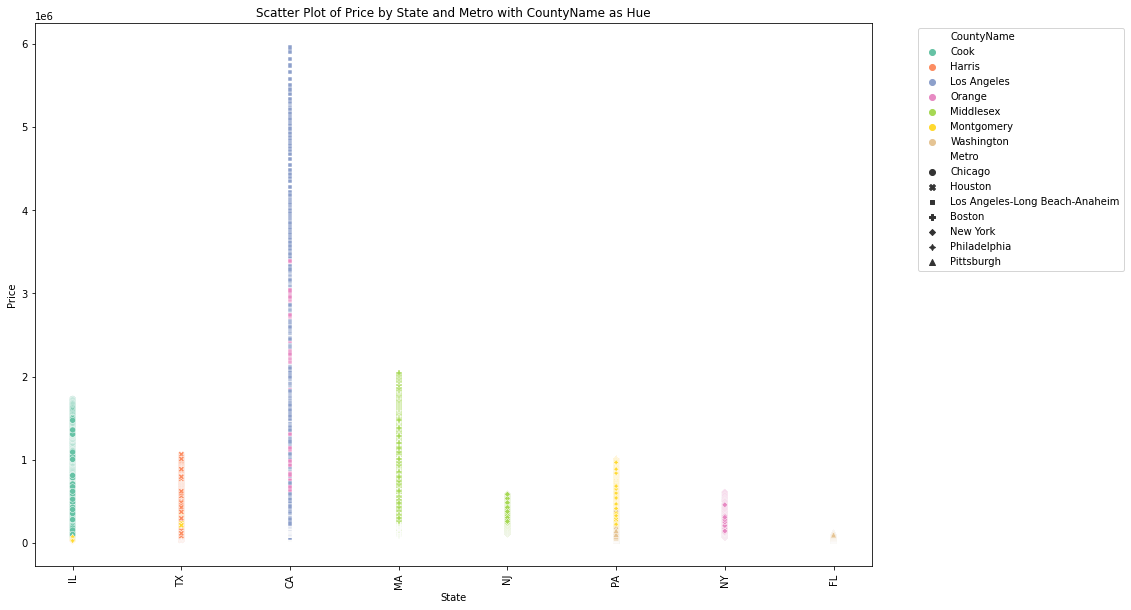

In [44]:
# To avoid overcrowding the plot, we can filter the data to include only the top categories
top_states = df['State'].value_counts().index[:10]  # Top 10 states
top_metros = df['Metro'].value_counts().index[:10]  # Top 10 metros
top_counties = df['CountyName'].value_counts().index[:10]  # Top 10 counties

# Filter the dataframe
df_filtered = df[df['State'].isin(top_states) & df['Metro'].isin(top_metros) & df['CountyName'].isin(top_counties)]

# Plot Price against State and Metro with CountyName as hue
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_filtered, x='State', y='Price', hue='CountyName', style='Metro', palette='Set2')
plt.title('Scatter Plot of Price by State and Metro with CountyName as Hue')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.show()

<ipython-input-45-f1da61db11bd>:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Price')


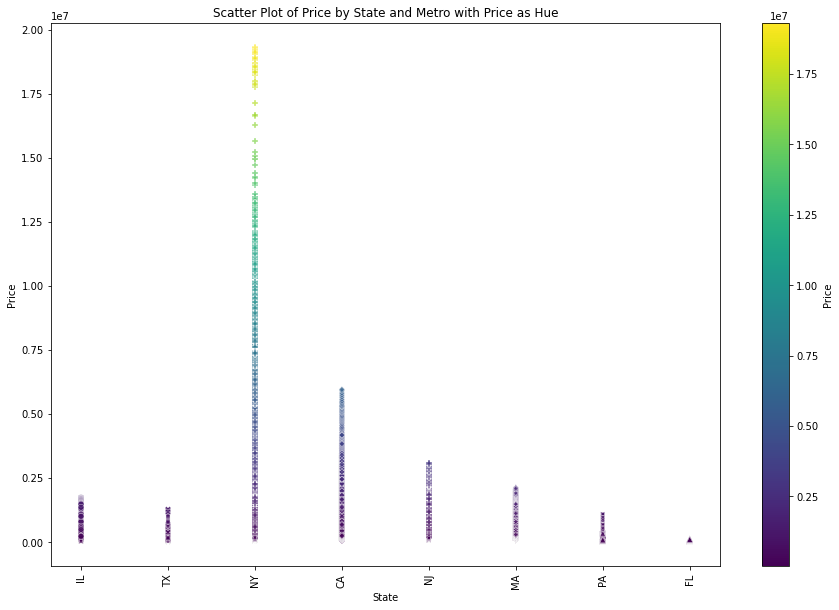

In [45]:
# To avoid overcrowding the plot, we can filter the data to include only the top categories
top_states = df['State'].value_counts().index[:10]  # Top 10 states
top_metros = df['Metro'].value_counts().index[:10]  # Top 10 metros

# Filter the dataframe
df_filtered = df[df['State'].isin(top_states) & df['Metro'].isin(top_metros)]

# Plot Price against State and Metro with Price as hue
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(data=df_filtered, x='State', y='Price', hue='Price', style='Metro', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Price by State and Metro with Price as Hue')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Customize the color bar
norm = plt.Normalize(df_filtered['Price'].min(), df_filtered['Price'].max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
scatter.get_legend().remove()
plt.colorbar(sm, label='Price')

plt.show()

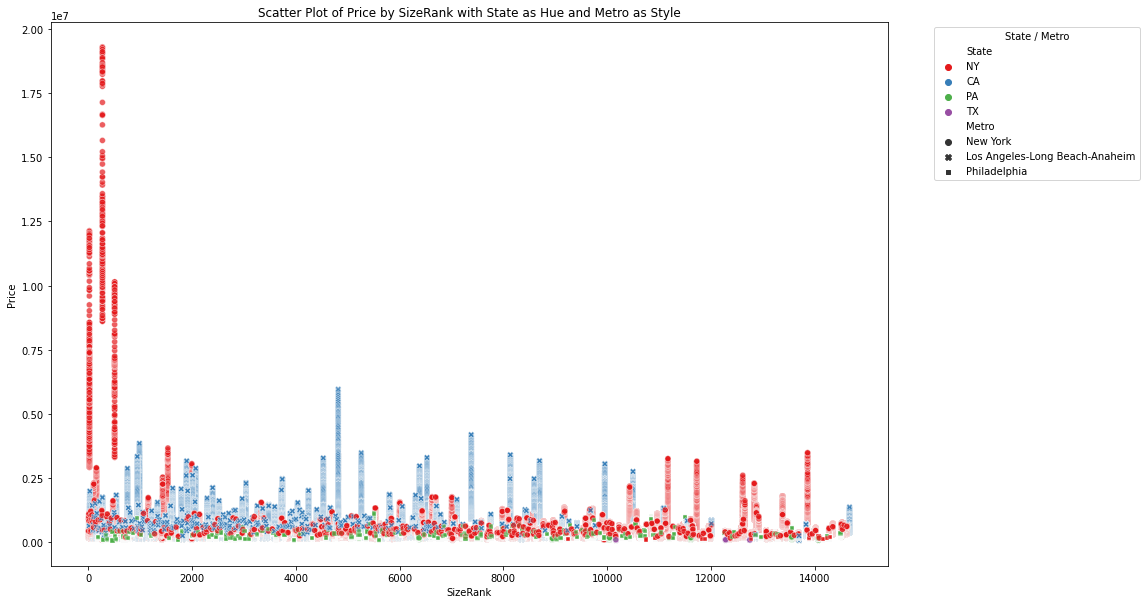

In [46]:
# To avoid overcrowding the plot, we can filter the data to include only the top categories
top_states = df['State'].value_counts().index[:5]  # Top 10 states
top_metros = df['Metro'].value_counts().index[:5]  # Top 10 metros

# Filter the dataframe
df_filtered = df[df['State'].isin(top_states) & df['Metro'].isin(top_metros)]

# Plot Price against SizeRank with State as hue and Metro as style
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(data=df_filtered, x='SizeRank', y='Price', hue='State', style='Metro', palette='Set1', alpha=0.7)
plt.title('Scatter Plot of Price by SizeRank with State as Hue and Metro as Style')
plt.xlabel('SizeRank')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State / Metro')
plt.show()

In [47]:
# # Ensure the 'Date' column is in datetime format
# data.index = pd.to_datetime(data.index)

# # Create a new column 'Year' by extracting the year from the 'Date' column
# data['Year'] = data.index.year

In [48]:
df.index = pd.to_datetime(df.index)
# Add the year column
df['year'] = df.index.year

In [49]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price,year
Date,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,1996
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,1996
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.00,1996
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,1996
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,1996
...,...,...,...,...,...,...,...,...,...
2018-04-01,62697,12720,Bethel,NY,Claremont,Sullivan,14718,117700.00,2018
2018-04-01,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,209300.00,2018
2018-04-01,59107,3293,Woodstock,NH,Claremont,Grafton,14720,225800.00,2018


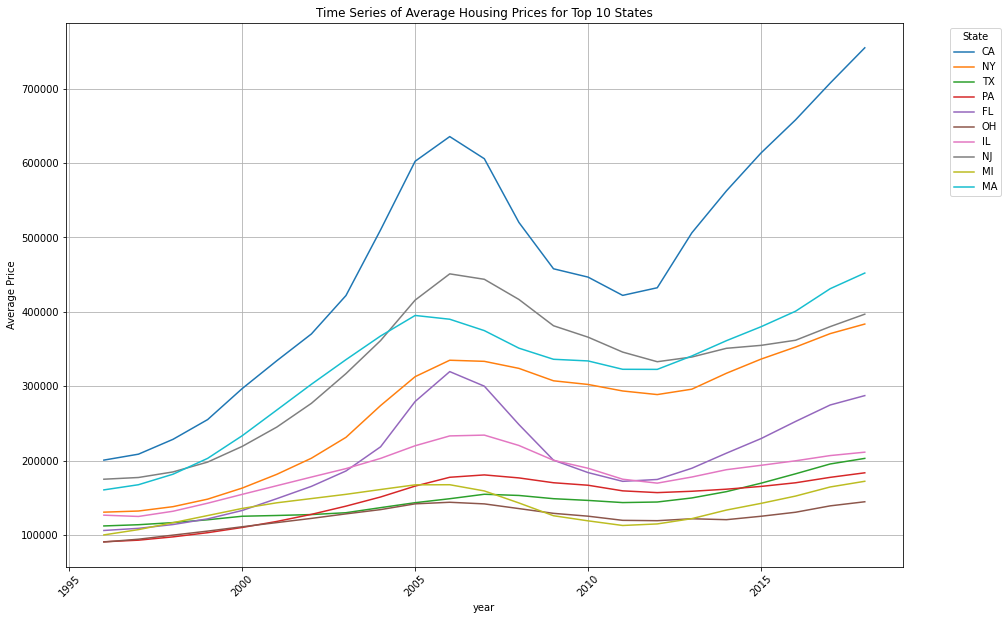

In [50]:
# Identify the top 10 states by frequency
top_states = df['State'].value_counts().index[:10]

# Filter the data to include only the top 10 states
df_filtered = df[df['State'].isin(top_states)]

# Aggregate the Price data by State and Date
df_agg = df_filtered.groupby(['year', 'State'])['Price'].mean().unstack()

# Plot the time series data for each of the top 10 states
plt.figure(figsize=(15, 10))

for state in top_states:
    plt.plot(df_agg.index, df_agg[state], label=state)

plt.title('Time Series of Average Housing Prices for Top 10 States')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In 2006, the housing market in the United States experienced significant developments that marked the beginning of a broader financial crisis. Key events and trends include:

Housing Bubble Peak: By 2006, housing prices had reached their peak after years of rapid growth driven by low interest rates, easy credit, and speculative investment.

Subprime Mortgage Boom: A significant portion of home loans issued during this period were subprime mortgages, which were given to borrowers with poor credit histories. These loans often had adjustable rates that started low but could increase significantly.

Increase in Foreclosures: As the adjustable rates on these subprime mortgages began to reset to higher levels, many homeowners found themselves unable to afford their mortgage payments, leading to a sharp increase in foreclosures.

Decline in Home Prices: By mid-2006, home prices began to decline. This decline was exacerbated by the rising number of foreclosures, which increased the supply of homes on the market and further drove down prices.

Credit Crunch: As mortgage defaults increased, financial institutions that had invested heavily in mortgage-backed securities faced significant losses. This led to a tightening of credit as lenders became more cautious, making it harder for even creditworthy borrowers to obtain loans.

These factors combined to trigger the housing market collapse, which played a significant role in the broader financial crisis that unfolded in the following years, culminating in the Great Recession of 2007-2009.

In [54]:
df.to_csv(r'C:\Users\Kish\Documents\DSF-PT06\DSFPT06\Phase IV\Phase4project\cleaned_zillow.csv', index=False)

#### Principal Component Analysis (PCA)

PCA reduces the dimensionality of the data and helps in visualizing multivariate relationships.

In [51]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Price,year
Date,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.00,1996
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.00,1996
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.00,1996
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.00,1996
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.00,1996


In [ ]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# Select the variables for PCA
selected_columns = ['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', 'Price']

# Subset the DataFrame
df_subset = df[selected_columns]

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_subset, columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_encoded)



In [ ]:
# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components to the number of principal components you want to keep
principal_components = pca.fit_transform(df_standardized)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=principal_df, alpha=0.5)
plt.title('PCA of Selected Variables')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance by Principal Components: {explained_variance}')


In [ ]:
# Get unique values in the RegionName column
unique_region_names = df['RegionName'].unique()

# Display the unique values
print("Unique values in the 'RegionName' column:")
print(unique_region_names)

# Optionally, print the count of unique values
print("\nNumber of unique values in the 'RegionName' column:")
print(len(unique_region_names))

In [ ]:
# Set the date column as the index
# df.set_index('Date', inplace=True)

# Group data by zip code
zip_code_groups = df.groupby('RegionName')

# # Example: Plotting time series for a single zip code
# import matplotlib.pyplot as plt

# zip_code_sample = zip_code_groups.get_group(90210)  # Replace with an actual zip code from your dataset
# zip_code_sample['Price'].plot(figsize=(12, 6))
# plt.title('Real Estate Prices for Zip Code 90210')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

In [ ]:
# Group data by zip code
state_groups = df.groupby('State')


state_sample = state_groups.get_group(IL)  
state_sample['Price'].plot(figsize=(12, 6))
plt.title('Real Estate Prices for IL State')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# Get counts of each unique value in the 'State' column
state_counts = df['State'].value_counts().sort_values(ascending=False)

# Display the counts
print(len(state_counts))
print("Counts of each state in the 'State' column from highest to lowest:")
print(state_counts)

# # Optionally, convert to DataFrame for better presentation
# state_counts_df = state_counts.reset_index()
# state_counts_df.columns = ['State', 'Count']

# # Display the DataFrame
# print("\nState counts as DataFrame:")
# print(state_counts_df)

# Step 3: EDA and Visualization

In [ ]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

# # NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
# def melt_data(df):
#     """
#     Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
#     Returns a long-form datetime dataframe 
#     with the datetime column names as the index and the values as the 'values' column.
    
#     If more than one row is passes in the wide-form dataset, the values column
#     will be the mean of the values from the datetime columns in all of the rows.
#     """
    
#     melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
#     melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
#     melted = melted.dropna(subset=['value'])
#     return melted.groupby('time').aggregate({'value':'mean'})

In [ ]:
# melt_data(df)

# Step 5: ARIMA Modeling

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to fit ARIMA model and forecast
def fit_arima_model(data, order=(5, 1, 0)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 months
    return model_fit, forecast

# Fit ARIMA model for each zip code
forecast_results = {}
for name, group in zip_code_groups:
    model_fit, forecast = fit_arima_model(group['Price'])
    forecast_results[name] = forecast

# Example: Displaying the forecast for a single zip code
zip_code_forecast = forecast_results[90210]  # Replace with an actual zip code from your dataset
print(zip_code_forecast)


In [ ]:
# Calculate RMSE for each zip code
rmse_results = {}
for name, group in zip_code_groups:
    train_data = group['Price'][:-12]
    test_data = group['Price'][-12:]
    model_fit, forecast = fit_arima_model(train_data)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    rmse_results[name] = rmse

# Sort zip codes by RMSE (lower RMSE is better)
sorted_rmse = sorted(rmse_results.items(), key=lambda x: x[1])

# Select the top 5 zip codes with the lowest RMSE
top_5_zip_codes = sorted_rmse[:5]
print("Top 5 zip codes for investment:", top_5_zip_codes)


# Step 6: Interpreting Results

In [ ]:
# Generate summary report
report = """
# Real Estate Investment Recommendation Report

## Introduction
This report aims to identify the top 5 zip codes for real estate investment based on forecasted price trends.

## Data Overview
The data includes real estate prices from various zip codes provided by Zillow. The dataset was preprocessed to handle missing values and set the date column as the index.

## Methodology
We used the ARIMA model for time series forecasting due to its effectiveness in handling real estate price trends. The model was evaluated using RMSE to select the best-performing zip codes.

## Results
Based on the RMSE, the top 5 zip codes for investment are: {}
""".format(top_5_zip_codes)

print(report)
